<a href="https://colab.research.google.com/github/guocuimi/minitf/blob/master/applications/Visual_Search_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf



## Set up dataset
This tutorial uses a dataset of about 3,700 photos of flowers. The dataset contains 5 sub-directories, one per class:
```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```


In [ ]:
import pathlib
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

/root/.keras/datasets/flower_photos


In [ ]:
!ls -lh /root/.keras/datasets/flower_photos

total 608K
drwx------ 2 270850 5000  36K Feb 10  2016 daisy
drwx------ 2 270850 5000  52K Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 409K Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36K Feb 10  2016 roses
drwx------ 2 270850 5000  36K Feb 10  2016 sunflowers
drwx------ 2 270850 5000  36K Feb 10  2016 tulips


after downloading, you should now have a copy of the dataset available. There are 3,670 total images:

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


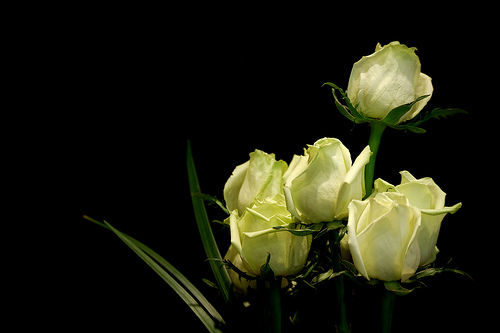

In [ ]:
import PIL
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

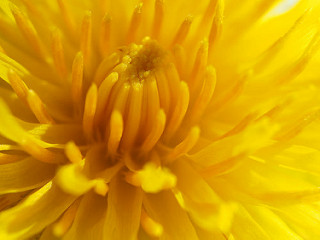

In [ ]:
dandelions = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelions[0]))

### Create training and validation datasets

In [ ]:
img_height = 180
img_width = 180
BATCH_SIZE = 64 #@param {type:"integer"}

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=110,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=110,
  image_size=(img_height, img_width),
  batch_size=BATCH_SIZE)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### Visualize the data

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


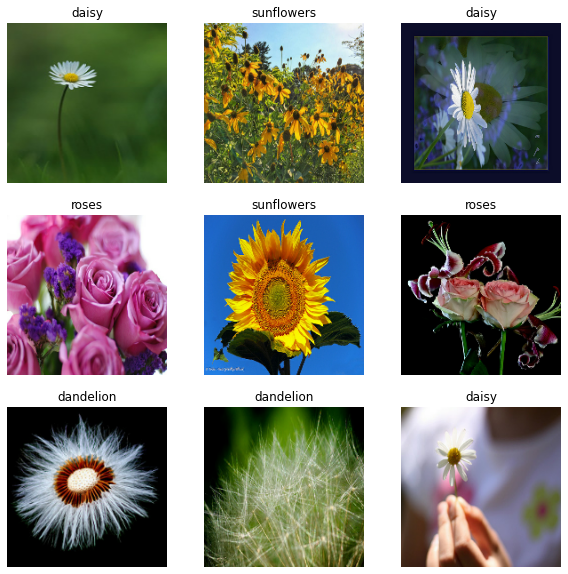

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Image classification

### Define the model

In [ ]:
from tensorflow.keras import datasets, layers, models

model = tf.keras.Sequential([
    # layers.experimental.preprocessing.RandomFlip("horizontal", 
    #                                              input_shape=(img_height, 
    #                                                           img_width,
    #                                                           3)),
    # layers.experimental.preprocessing.RandomRotation(0.1),
    # layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(5)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
46/46 [==============================] - 6s 121ms/step - loss: 1.3335 - accuracy: 0.4217 - val_loss: 1.1119 - val_accuracy: 0.5204
Epoch 2/15
46/46 [==============================] - 3s 71ms/step - loss: 0.9804 - accuracy: 0.6182 - val_loss: 0.9670 - val_accuracy: 0.6117
Epoch 3/15
46/46 [==============================] - 3s 72ms/step - loss: 0.8134 - accuracy: 0.6884 - val_loss: 0.9471 - val_accuracy: 0.6403
Epoch 4/15
46/46 [==============================] - 3s 72ms/step - loss: 0.6128 - accuracy: 0.7684 - val_loss: 0.9326 - val_accuracy: 0.6308
Epoch 5/15
46/46 [==============================] - 3s 72ms/step - loss: 0.4032 - accuracy: 0.8600 - val_loss: 1.0184 - val_accuracy: 0.6403
Epoch 6/15
46/46 [==============================] - 3s 72ms/step - loss: 0.2368 - accuracy: 0.9254 - val_loss: 1.2403 - val_accuracy: 0.6308
Epoch 7/15
46/46 [==============================] - 3s 72ms/step - loss: 0.1452 - accuracy: 0.9591 - val_loss: 1.3551 - val_accuracy: 0.6172
Epoch 8/15
4

### Visualize training results

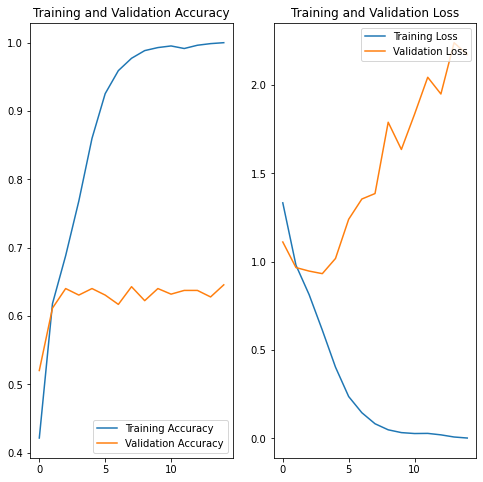

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predict on new data

In [ ]:
import numpy as np
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

122880/117948 [===============================] - 0s 0us/step
This image most likely belongs to sunflowers with a 100.00 percent confidence.


## Image embedding

### Define the model

In [ ]:
EMBEDDING_SIZE =  256#@param {type:"integer"}

In [ ]:
model2 = tf.keras.Sequential([
    # layers.experimental.preprocessing.RandomFlip("horizontal", 
    #                                              input_shape=(img_height, 
    #                                                           img_width,
    #                                                           3)),
    # layers.experimental.preprocessing.RandomRotation(0.1),
    # layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    tf.keras.layers.Dense(EMBEDDING_SIZE, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings

])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

###Train the model
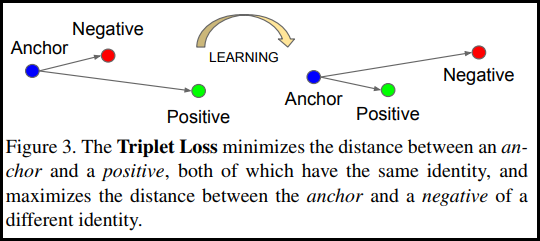

In [ ]:
import tensorflow_addons as tfa
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss())

In [ ]:
epochs=15
history2 = model2.fit(
  train_ds,
  epochs=epochs
)

Epoch 1/15
46/46 [==============================] - 3s 68ms/step - loss: 0.9602
Epoch 2/15
46/46 [==============================] - 3s 67ms/step - loss: 0.9292
Epoch 3/15
46/46 [==============================] - 3s 66ms/step - loss: 0.9233
Epoch 4/15
46/46 [==============================] - 3s 66ms/step - loss: 0.9106
Epoch 5/15
46/46 [==============================] - 3s 66ms/step - loss: 0.8819
Epoch 6/15
46/46 [==============================] - 3s 66ms/step - loss: 0.8321
Epoch 7/15
46/46 [==============================] - 3s 66ms/step - loss: 0.7524
Epoch 8/15
46/46 [==============================] - 3s 66ms/step - loss: 0.6334
Epoch 9/15
46/46 [==============================] - 3s 66ms/step - loss: 0.5131
Epoch 10/15
46/46 [==============================] - 3s 67ms/step - loss: 0.3931
Epoch 11/15
46/46 [==============================] - 3s 67ms/step - loss: 0.2868
Epoch 12/15
46/46 [==============================] - 3s 67ms/step - loss: 0.1574
Epoch 13/15
46/46 [==================

In [ ]:
results = model2.predict(val_ds)
print(results[0])
# Notice the feature values are now in `[-1, 1]`.
print(np.min(results[0]), np.max(results[0])) 

[ 4.94965613e-02 -4.14590538e-02 -3.63473631e-02  4.32649069e-02
 -5.35161197e-02  4.73224483e-02  6.30932525e-02  2.64288019e-02
  3.88632379e-02 -1.40055157e-02  1.44440066e-02 -2.72485875e-02
  3.85396481e-02 -4.71481606e-02 -5.01983352e-02 -1.73254367e-02
 -2.51137987e-02 -3.23200293e-05 -5.43653704e-02  4.82119108e-03
 -1.34300170e-02 -7.56233837e-03 -5.09232953e-02 -1.57729015e-01
 -3.10566295e-02  3.81812491e-02 -4.17666472e-02 -4.31820825e-02
  3.68545428e-02  7.08053261e-02 -4.36257198e-02 -2.39594169e-02
  8.13580304e-02  2.35979930e-02  2.12306716e-02  1.39920984e-03
 -4.27328423e-02  5.37717566e-02  9.92743894e-02  2.90032681e-02
  3.07077589e-03  5.75993583e-02 -9.48964879e-02 -3.52334641e-02
 -8.61704722e-02 -3.81017067e-02 -1.41562104e-01 -4.61277701e-02
  4.26438637e-03 -4.93668132e-02 -8.30918103e-02 -1.48519173e-01
 -1.44044146e-01 -1.30485699e-01  7.17975870e-02  2.35992367e-03
 -7.03714341e-02 -7.79680116e-03  6.76409379e-02 -8.31100624e-03
  8.12425241e-02  8.57164

##Embedding based retrieval

* Tree based

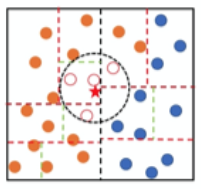
* LSH + Inverted index

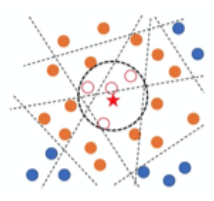
* Graph based

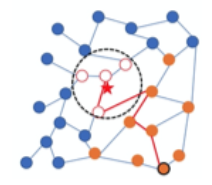


### HNSW (State of the art)
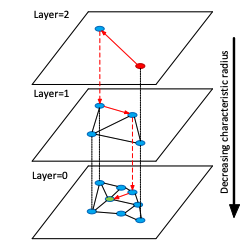

###Build hnsw index

In [ ]:
!pip install hnswlib

     |████████████████████████████████| 296kB 3.9MB/s 
  ERROR: Failed building wheel for hnswlib
  Running setup.py clean for hnswlib
Failed to build hnswlib
    Running setup.py install for hnswlib ... done


In [ ]:
all_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=110,
  image_size=(img_height, img_width),
  batch_size=image_count)
print(image_count)

Found 3670 files belonging to 5 classes.
3670


In [ ]:
class_names = all_ds.class_names
for image_batch, labels_batch in all_ds:
  all_images = image_batch.numpy()
  all_labels = labels_batch.numpy()
  break


features = model2.predict(all_images)
labels_index = np.arange(image_count)

In [ ]:
import hnswlib

# Declaring index
p = hnswlib.Index(space = 'cosine', dim = EMBEDDING_SIZE)

# Initing index
p.init_index(max_elements = image_count, ef_construction = 200, M = 16)

# Element insertion
p.add_items(features, labels_index)

# Controlling the recall by setting ef:
p.set_ef(50)

p.save_index('hnsw.index')
!ls -lh

total 4.2M
-rw-r--r-- 1 root root 4.2M Oct 14 07:14 hnsw.index
drwxr-xr-x 1 root root 4.0K Oct  5 16:31 sample_data


###Load hnsw index

In [ ]:
import hnswlib

p = hnswlib.Index(space = 'cosine', dim = EMBEDDING_SIZE)
p.load_index('hnsw.index', max_elements = image_count)

labels, distances = p.knn_query([features[0]], 5)
print(labels, distances)

[[   0  977 3155 1182 2591]] [[0.         0.04119998 0.0412674  0.04150534 0.04776847]]


### Random testing

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt 

class_names = all_ds.class_names
def plot_predictions(images, labels, distances):
    gs = gridspec.GridSpec(3, 3)
    fig = plt.figure(figsize=(15, 15))
    gs.update(hspace=0.1, wspace=0.1)
    for i, (gg, image) in enumerate(zip(gs, images)):
        gg2 = gridspec.GridSpecFromSubplotSpec(10, 10, subplot_spec=gg)
        ax = fig.add_subplot(gg2[:,:])
        ax.imshow(image)
        ax.axes.set_title("{} ({:.4f})".format(labels[i], distances[i]))
        ax.axis("off")
def search(N, k):
    # Query dataset, k - number of closest elements (returns 2 numpy arrays)
    q_idxs, q_distances = p.knn_query([features[N]], k = k)
    images = [all_images[idx].astype("uint8") for idx in q_idxs[0]]
    labels = [class_names[all_labels[idx]] for idx in q_idxs[0]]
    plot_predictions(images, labels, q_distances[0])

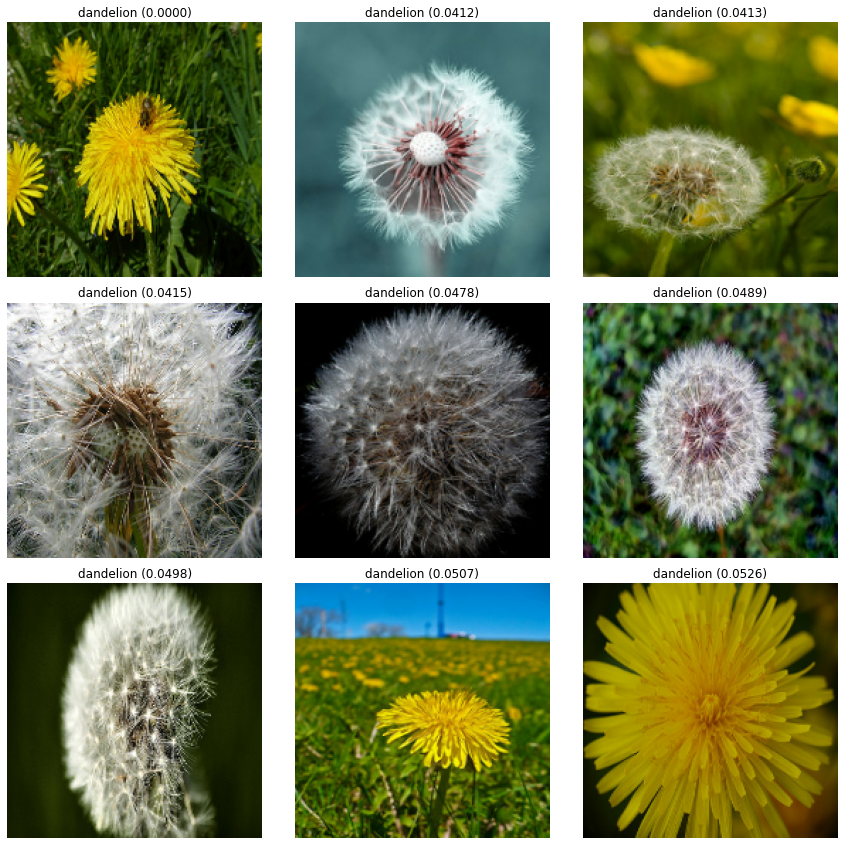

In [ ]:
search(0, 9)

### Search on new data

172032/169762 [==============================] - 0s 0us/step


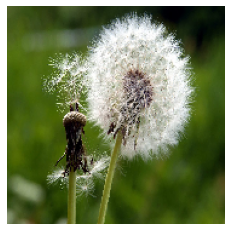

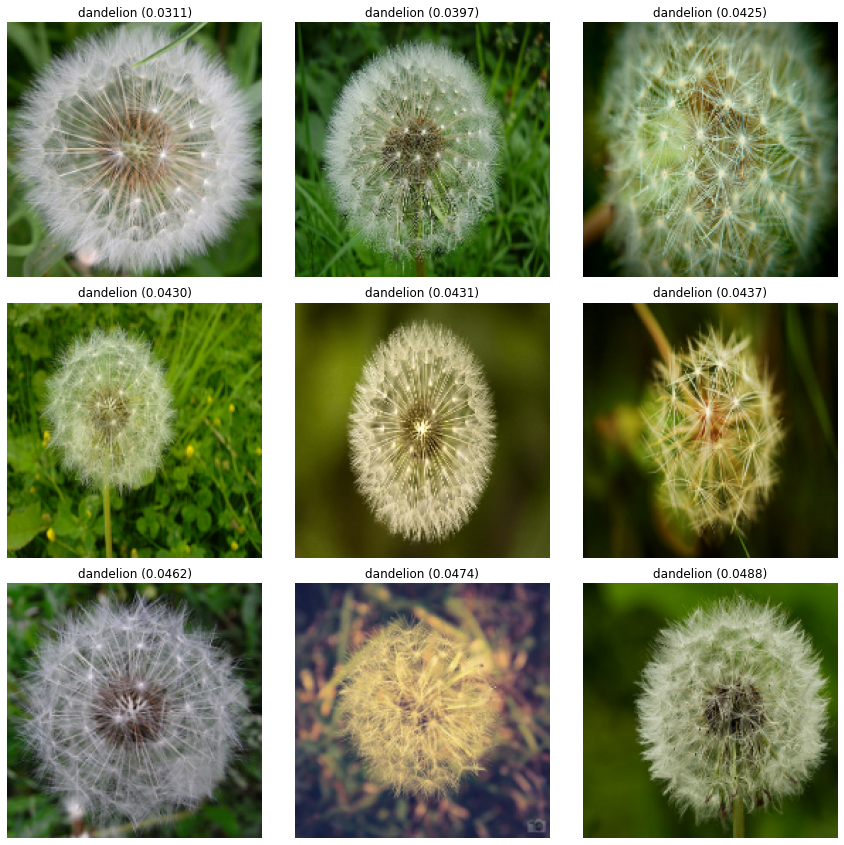

In [ ]:
query_url = "https://www.gardeningknowhow.com/wp-content/uploads/2017/08/dandelion-seed-head.jpg"
query_path = tf.keras.utils.get_file('dandelion_seed_head', origin=query_url)


img = tf.keras.preprocessing.image.load_img(
    query_path, target_size=(img_height, img_width)
)

# show query
plt.imshow(img)
plt.axis("off")

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model2.predict(img_array)

# show matches
q_idxs, q_distances = p.knn_query(predictions, k = 9)
images = [all_images[idx].astype("uint8") for idx in q_idxs[0]]
labels = [class_names[all_labels[idx]] for idx in q_idxs[0]]
plot_predictions(images, labels, q_distances[0])